In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eval_file_name = "qtb/qgye1/qeval.txt"

In [3]:
# with open(eval_file_name, 'r') as f:
#     qeval = list(csv.reader(f, delimiter = ';'))

# qeval = np.loadtxt(eval_file_name, delimiter=";", dtype=str)

columns = ['epsilon_type','train_episodes','percent_dones','avg_steps']
qeval = pd.read_csv(eval_file_name, sep=";", header=None, names=columns)

In [4]:
evals={}
for e_type in 'abcdef':
    eval_t = qeval[qeval['epsilon_type']==e_type].sort_values('train_episodes')[['train_episodes', 'percent_dones', 'avg_steps']]
    evals[e_type] = eval_t.set_index('train_episodes')
evals["a"].head()

,percent_dones,avg_steps
train_episodes,,
1000,19.67,9.847458
2000,46.67,11.328571
3000,55.00,11.684848
4000,62.67,11.952128
5000,71.00,12.244131


Text(0.5, 0, 'train episodes')

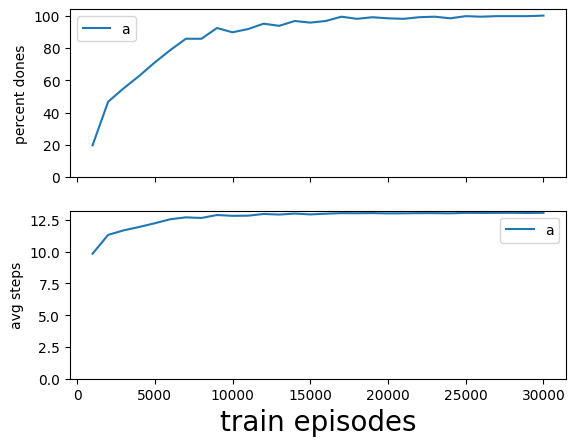

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# ax1.set_title("percent dones", size = 20)

ax1.plot(evals["a"]['percent_dones'])
ax1.legend(["a"])
ax1.set_ylabel("percent dones")
ax1.set_ylim(bottom=0)

ax2.plot(evals["a"]['avg_steps'])
ax2.legend(["a"])
ax2.set_ylabel("avg steps")
ax2.set_ylim(bottom=0)

ax2.set_xlabel("train episodes", size = 20)

Text(0.5, 0, 'train episodes')

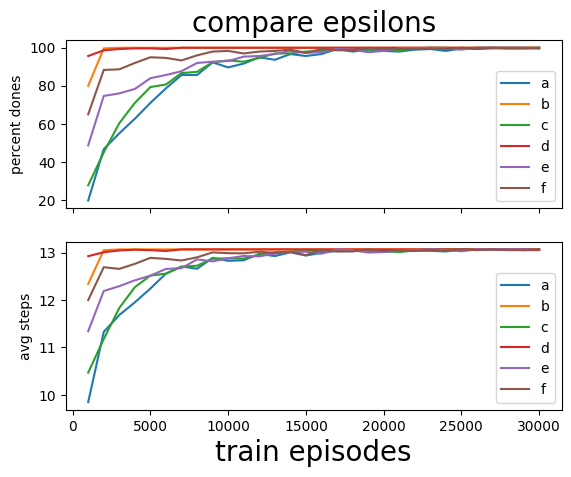

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for e in evals:
    ax1.plot(evals[e]['percent_dones'])
    ax2.plot(evals[e]['avg_steps'])

ax1.set_title("compare epsilons", size = 20)

ax1.legend(evals.keys())
ax1.set_ylabel("percent dones")
# ax1.set_ylim(bottom=0)

ax2.legend(evals.keys())
ax2.set_ylabel("avg steps")
# ax2.set_ylim(bottom=0)
    
ax2.set_xlabel("train episodes", size = 20)